In [1]:
import import_ipynb
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.utils import check_metric

In [2]:
dataset = pd.read_csv("C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\banking.csv")

In [3]:
dataset.shape

(41188, 21)

In [10]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# In order to demonstrate the predict_model() function on unseen data, a sample of 600 has been withheld from 
# the original dataset to be used for predictions. Separate from the train/test split.
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions (4119, 21)


In [11]:
# passing customization parameters in setup (this would otherwise be defaulted). Preprocessing steps are taken place here.
exp_reg102 = setup(data= data, target = 'y', session_id=123,
                  normalize = True, transformation = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  bin_numeric_features = ['duration'], feature_selection= True,
                  log_experiment = True, experiment_name = 'y1') 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


2022/02/09 14:47:49 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [17]:
# option of how to compare models
top3 = compare_models(exclude = ['et'], n_select = 3, sort= 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9162,0.9475,0.5398,0.6542,0.5913,0.5451,0.5484,0.1250
gbc,Gradient Boosting Classifier,0.9129,0.9398,0.4273,0.6783,0.5239,0.4787,0.4944,1.2880
ada,Ada Boost Classifier,0.9082,0.9382,0.3787,0.6599,0.4808,0.4346,0.4550,0.3700
lr,Logistic Regression,0.9101,0.9373,0.4301,0.6522,0.5180,0.4708,0.4834,0.5980
rf,Random Forest Classifier,0.9104,0.9373,0.4572,0.6433,0.5342,0.4862,0.4951,0.9000
lda,Linear Discriminant Analysis,0.9080,0.9331,0.5819,0.5929,0.5871,0.5353,0.5355,0.3380
nb,Naive Bayes,0.8317,0.9132,0.8561,0.3945,0.5372,0.4527,0.5049,0.0420
knn,K Neighbors Classifier,0.8954,0.7942,0.3060,0.5639,0.3963,0.3446,0.3641,2.8470
dt,Decision Tree Classifier,0.8890,0.7224,0.5072,0.5065,0.5066,0.4441,0.4442,0.0960
dummy,Dummy Classifier,0.8875,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0220


In [20]:
print(f'{type(top3)}\n\n{top3}')

<class 'list'>

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
      

In [21]:
# create a model with 5 fold cross validation
lightgbm = create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9160,0.9462,0.5291,0.6574,0.5863,0.5402,0.5441
1,0.9208,0.9532,0.5616,0.6791,0.6148,0.5711,0.5743
2,0.9129,0.9450,0.5034,0.6447,0.5654,0.5178,0.5227
3,0.9181,0.9417,0.5609,0.6593,0.6061,0.5607,0.5630
4,0.9167,0.9478,0.5506,0.6538,0.5978,0.5517,0.5542
Mean,0.9169,0.9468,0.5411,0.6589,0.5941,0.5483,0.5517
SD,0.0026,0.0038,0.0222,0.0113,0.0172,0.0183,0.0176


In [22]:
# default 10 iterations of 10 folds (100 fits)
tuned_light = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9156,0.9456,0.4829,0.6746,0.5629,0.5176,0.5265
1,0.9187,0.9495,0.5377,0.6738,0.5981,0.5535,0.5579
2,0.9249,0.9585,0.5616,0.7100,0.6272,0.5860,0.5910
3,0.9129,0.9503,0.4555,0.6650,0.5407,0.4944,0.5052
4,0.9137,0.9471,0.4829,0.6589,0.5573,0.5107,0.5183
5,0.9129,0.9477,0.4829,0.6528,0.5551,0.5080,0.5151
6,0.9195,0.9421,0.5240,0.6861,0.5942,0.5504,0.5565
7,0.9160,0.9435,0.5171,0.6623,0.5808,0.5349,0.5399
8,0.9171,0.9424,0.5223,0.6667,0.5857,0.5404,0.5454
9,0.9190,0.9528,0.4983,0.6938,0.5800,0.5365,0.5455


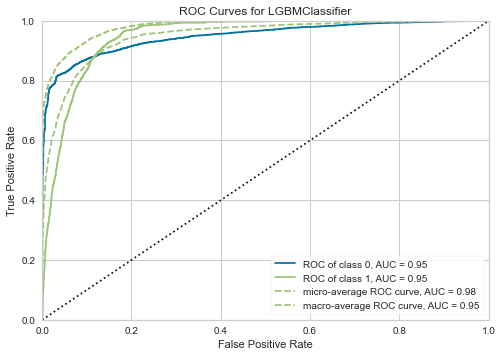

In [23]:
plot_model(tuned_light, plot = 'auc')

In [24]:
predict_model(tuned_light);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9162,0.9486,0.5344,0.6624,0.5916,0.5455,0.5494


In [29]:
final_light = finalize_model(tuned_light)

In [30]:
predict_model(final_light);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9241,0.9561,0.5772,0.7016,0.6334,0.5915,0.5950


In [31]:
# unseen data/ validation data
unseen_predictions = predict_model(final_light, data=data_unseen)
unseen_predictions.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,Label,Score
0,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,0,0.9985
1,55,management,married,university.degree,no,no,no,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1,0,0.9510
2,26,admin.,married,high.school,no,no,yes,telephone,jun,mon,...,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0,0,0.5265
3,32,technician,married,basic.9y,unknown,no,no,telephone,jun,thu,...,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0,0,0.9981
4,39,management,married,university.degree,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0.9984


In [32]:
check_metric(unseen_predictions['y'], unseen_predictions['Label'], metric = 'Accuracy')

0.9182